# Power Prediction on Wind Turbine Speed using Keras

The purpose of this notebook is to create a Model that can attempt to accurately predict the power produced from a certain speed, using a power production dataset for a wind turbine.

#### What is Keras

Keras is a package that is part of the Tensorflow suite and is used to create layered machine learning models in order to predict categorical or regression based models. These models can contain text,numbers,imagery or sound depending on the wants and use cases of the developer/user.

#### Getting Started
To start off we will import Keras from Tensorflow along with some data management and reading services.



In [1]:
# Data Frame Import
import pandas as pd

# Plotting the Data Import
import matplotlib.pyplot as plt

# Numpy Import 
import numpy as np

# Machine Learning Imports (Keras)
import tensorflow as tf 
from tensorflow import  keras
from tensorflow.keras import layers

# SkLearn to split the training and test data for Training
from sklearn.model_selection import train_test_split

Firstly we need to read in our power production CSV file using Pandas.
It is possible to use any CSV file here but for this use case we are going to be using **powerproduction.csv** which is located in the directory of this notebook.

In [2]:
powerproduction = pd.read_csv("powerproduction.csv")
#Print the result of panda's data reading of the csv file
print(powerproduction)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Splitting the Dataset into Training and Testing
Next we will split our dataset into training and testing data. To do this we will be using sklearn's train_split module.

It's important to do this as we can use the testing data to evaluate the effectiveness of our predictions later along with having a sample of data to train the model with rather than the full batch of data.

In [3]:
# Create variables X_train , X_test , y_train and y_test from the powerproduction datasets speed and power columns.
# We will give 20% of our dataset to the testing variables and the other 80% to our training data.
X_train, X_test, y_train, y_test = train_test_split(powerproduction[['speed']], powerproduction[['power']], test_size=0.2)

# Set X_train and y_train as Numpy Arrays. These are easier to work with within Keras as they are more reckongnizeable
# by machine learning methods.
X_train = np.array(X_train)
y_train = np.array(y_train)

### Creating the ML Model
To create the machine learning model we are going to use Keras's sequential mode where each layer is read through in sequential ordering. We will also create a callback function to ensure that the training does not run longer then it needs to and will only run as long as the loss is lowering.

We will then create Dense Layers with a decent amount of neurons to train the data with the activation function being **ReLu** which stands for **Rectified linear activation function**. The reason we are using this function is because with Sigmoid activation and hyberbolic tangent functions, there is a issue called vanishing gredient where data can be lost as the model gets further into training. With Relu vanishing gradient is minimized further and relu works quicker and often easier to train models with.

It is also important to note the layer of normalization, since the dataset of power production is spontanious and hard to work with, normalization can help the training figure out how to approach the dataset and lower the losses incurred by its hard to learn value drops and rises.
It does this by applying a transformation that maintains the mean activation within each example close to 0 and the activation standard deviation close to 1. Often normalization is used on datasets before training but within keras it's possible to add a normalization layer or batch normalization to help improve the outcomes of training in some datasets.

In [4]:
# Call Back Function to ensure Epochs do not run longer then needed
# Monitor Loss as the reason to Early Stop
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=16)

# Create a Sequential Keras Model
model = keras.models.Sequential()

# Input Layer
model.add(layers.Dense(128, activation='relu',input_dim=1))

# Normalization Layer
model.add(layers.LayerNormalization(axis=1))

# Depth Layers
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(1, activation='linear'))

### Creating a Optimizer
For this model I am using Adam with a low learning rate and low decay rate, this gives the time for the machine to learn from the model rather then a high learning rate where it may risk skipping over details and accuracy in hope for speed.

In [5]:
# Creating a Adam Optimizer (Low Learning Rate)
adam = keras.optimizers.Adam(lr=0.0005, decay=1e-6)

### Compiling the Model
We will compile the model using the layers created and our optimizer created above. Then set the loss to mean squared error which measures the average squared difference between the estimated values and the actual value.
I will also add a metric for Mean Absolute Error which is the absolute difference between estimated and actual values.


In [6]:
# Compile the Model using Mean Squared Error MSE with the created adam optimizer. 
model.compile(loss='mean_squared_error', optimizer=adam , metrics=["mae"])

### Fitting the Model
Finally we can fit the model, and create it. We do this by passing in our x and y training variables/values and setting the epoch,batchsize,callback and validation splits. Its possible to do it with just the epochs and batch size but for accuracy to our prediction training, adding in a Early stopping callback and validation split is prefered.

A Batch sized of 32 is often used as a baseline for prediction models. Batch size is how much data is passed in at one time into the training layers and epochs are the amount of trials the training will go through before finishing up with a value. To stop the trials(epochs) when losses are no longer going down is the purpose of the callback function (Early Stopping).

*Note: As the model is trained using randomized data from the Power Production Dataset. It is important to note that the values you may recieve will differ to what I have recieved. The lowest I have gotten is a Loss of 54. But this model fluctuated between 70-250 Loss mostly. So if your loss is higher than 200. Run the Fit Code Block Again.*




In [10]:
model.fit(X_train,y_train,epochs=1200, batch_size =32,verbose = 1,callbacks=[callback],validation_split=0.2)

Epoch 1/1200
10/10 [==============================] - 0s 10ms/step - loss: 188.0633 - mae: 5.8016 - val_loss: 337.0724 - val_mae: 6.9485
Epoch 2/1200
10/10 [==============================] - 0s 5ms/step - loss: 187.3427 - mae: 5.5680 - val_loss: 336.0062 - val_mae: 7.0141
Epoch 3/1200
10/10 [==============================] - 0s 5ms/step - loss: 186.3943 - mae: 5.6561 - val_loss: 333.4057 - val_mae: 7.2010
Epoch 4/1200
10/10 [==============================] - 0s 5ms/step - loss: 188.0276 - mae: 5.9889 - val_loss: 328.5754 - val_mae: 7.4474
Epoch 5/1200
10/10 [==============================] - 0s 5ms/step - loss: 188.0608 - mae: 5.8049 - val_loss: 338.4443 - val_mae: 6.9340
Epoch 6/1200
10/10 [==============================] - 0s 6ms/step - loss: 187.0318 - mae: 5.6790 - val_loss: 335.0169 - val_mae: 7.1944
Epoch 7/1200
10/10 [==============================] - 0s 6ms/step - loss: 187.4732 - mae: 5.9315 - val_loss: 333.2470 - val_mae: 7.2137
Epoch 8/1200
10/10 [===========================

Epoch 61/1200
10/10 [==============================] - 0s 5ms/step - loss: 185.1809 - mae: 5.6767 - val_loss: 326.0361 - val_mae: 7.0356
Epoch 62/1200
10/10 [==============================] - 0s 5ms/step - loss: 186.2162 - mae: 5.9401 - val_loss: 321.6336 - val_mae: 7.2359
Epoch 63/1200
10/10 [==============================] - 0s 5ms/step - loss: 186.9935 - mae: 5.9187 - val_loss: 333.4891 - val_mae: 6.9224
Epoch 64/1200
10/10 [==============================] - 0s 5ms/step - loss: 185.6621 - mae: 5.5683 - val_loss: 331.0111 - val_mae: 6.9238
Epoch 65/1200
10/10 [==============================] - 0s 5ms/step - loss: 185.0176 - mae: 5.5841 - val_loss: 327.4207 - val_mae: 7.1573
Epoch 66/1200
10/10 [==============================] - 0s 5ms/step - loss: 185.2170 - mae: 5.6106 - val_loss: 329.5125 - val_mae: 6.9399
Epoch 67/1200
10/10 [==============================] - 0s 5ms/step - loss: 185.3568 - mae: 5.5893 - val_loss: 325.1439 - val_mae: 7.1144
Epoch 68/1200
10/10 [====================

### Evaluating and Plotting the Model
After the model has been created and trained. We can plot it on a matplotlib plotting graph and also evaluate the model's accuracy.
We kept the X_test and y_test values earlier for the use in evaluating model accuracy.

4/4 [==============================] - 0s 1ms/step - loss: 353.1693 - mae: 7.5776
Test loss: 353.1693115234375 / Test accuracy: 7.577610969543457


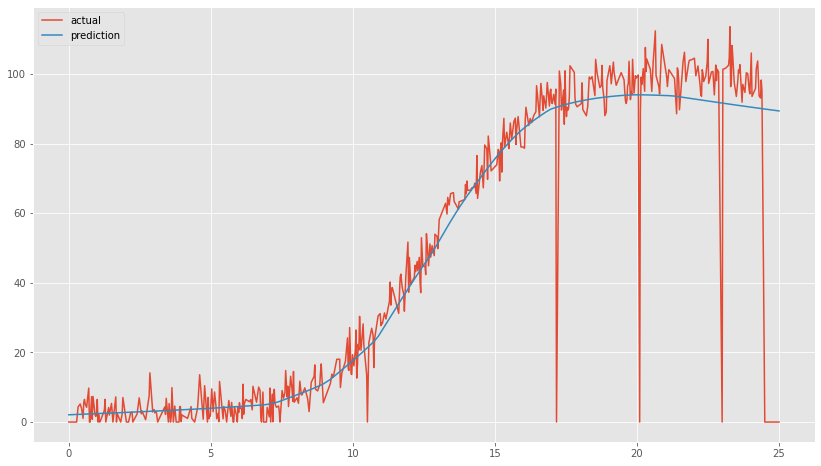

In [11]:
# Setting up PLT Plot Figure Size
plt.rcParams['figure.figsize'] = [14, 8]

# Infering to the plot what style to use.
plt.style.use("ggplot")

# Plotting the Data
plt.plot(powerproduction[['speed']], powerproduction[['power']], label='actual')
plt.plot(powerproduction[['speed']], model.predict(powerproduction[['speed']]), label='prediction')
plt.legend();


score = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

### Saving the Model
As we will be using this model later in a web service, it's important to save it as a h5 file type so that it's useable in an api or web service.

In [9]:
model.save("myModel.h5")

## Accuracy of the Above Model
As the powerproduction dataset has many large drops in values or sudden rises (High Variance per row of Power), it is very hard for this current regression model to predict the accurate power values based off the wind speed. As the dataset is inconsistent with the current model layers. The user will recieve different loss and val_loss outcomes everytime along with accuracy values. The accuracy of the evaluated test data above, will also change depending on the section of the data, the code randomly picks out to be used. 

Overall the model can be sometimes more accurate or less accurate depending on the run and sample sizes chosen by the code but it is difficult for the machine learning to make a very accurate model, thus the values predicted will always be afew points off but not entirely out of order as you can see in the above plotting that the power line (Y-Values) do tend to follow the curve of the actual data but do not seem to respond to the sudden dips or rises in the dataset. 

In the process of getting to the point of creating this model, I did try many combinations of activations, epochs, amount of neurons, normalization, drop out layers and layers of depth but none of them gave loss values lower than 100 and the lowest i got was using the above configuration of layers,epochs,batch size and callback functions which I found the best value during my runs of it within Visual Studio Code was *52 loss*.
This model seems to prefer less layers due to the singular input and output along with low learning rates to give it time to understand the variance between speed and power per row but the baseline models I have tried in Keras Machine learning and using the code prevented still fails to give an accurate model due to such variances in the dataset.

It may be possible to get better accuracy using a LTSM or GRU based model where the standard deviations between the rows of data are memorized and better utilized in effect, creating a better model that can account for the high amount of variance.

It is also important to note, that you can remove the 0 values in the power dataset which will give a lower mean squared loss but a worse prediction as the dips in the dataset will be ignored. This is why in this model I have opted to not perform the removal of the 0's and kept the dataset in it's original form. 

### Research Undertaken
The main place most of my research took place was on the Keras Website,particularly under the Keras API References, located here : https://keras.io/api/

I also did research into the difference between sigmoid and relu activation functions and why people tend to prefer the use of a relu on most common datasets in contrast to sigmoid https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks

I followed tensorflows own youtube channel in hopes of improving the model to no success but they did help me learn how keras functioned and the different layers people could potentially add beyond the dense layer such as Normalization or Categorical Encoding along with the issues with **over fitting** and **underfitting** models which are two key terms in the development of ML models.
https://www.youtube.com/channel/UC0rqucBdTuFTjJiefW5t-IQ

I did extensive research into alternative Keras model designs such as LTSM or GRU but I found issues in converting this dataset to one that could be used with those designs as they take a 3 Dimensional Array as a input and our input is only one dimensional. Through my hypothesis I would conclude a model using GRU or LTSM would give a better outcome as stated above as these models are often used by Stock Market Predictions and our data in a graph format follows a very similiar trend, in that there are large spikes in the power values which could be seen as similiar to fall and rises in stock prices.

https://en.wikipedia.org/wiki/Long_short-term_memory

https://en.wikipedia.org/wiki/Gated_recurrent_unit

It is also important to note the possible use of Standarization or Normalization in the Model and how if you could preprocess the model in a way to keep the loss lower but not effect the overall prediction accuracy, it would highly improve this model in theory. The preprocessing of data is a key component to preparing data for machine learning but it requires some mathamatical understanding and in that can be hard to do. Using scalars or min_max functions such as those used in sklearn, the model could be improved but in my own testing of these functions I did not recieve good results as I did not have the mathamatical knowledge to convert the inputs and values correctly into such methods of Standarization or Normalization in the Tensorflow or Sklearn Packages.
I learned information about preprocessing,normalization and Standarization at these following links.

https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://keras.io/api/preprocessing/


